In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
import os
import pandas as pd
import numpy as np
sys.path.append('../')
import utils
import calibration_utils as calibration
import scipy
import matplotlib.pyplot as plt

In [4]:
MEASUREMENT = "cal_1"
SENSORS_CSV_FILE = "./out/" + MEASUREMENT + "_S.csv"
CALIBRATION_MAT_FILE = "./out/" + MEASUREMENT + "_C_matrix.mat"

In [5]:
df = pd.read_csv(SENSORS_CSV_FILE)
df = df.drop(df.columns[0], axis=1)

In [6]:
df.head(10)

,S1,S2,S3,S4,S5,S6,S7,S8
0,1789,1780,1958,2165,1808,1613,1676,1781
1,1609,1731,1851,1970,1869,1635,1758,1984
2,1609,1731,1851,1970,1869,1635,1758,1984
3,1609,1731,1851,1970,1869,1635,1758,1984
4,1609,1731,1851,1970,1869,1635,1758,1984
5,1609,1731,1851,1970,1869,1635,1758,1984
6,1726,1887,2075,2216,2232,1944,2008,2250
7,1726,1887,2075,2216,2232,1944,2008,2250
8,1726,1887,2075,2216,2232,1944,2008,2250
9,1726,1887,2075,2216,2232,1944,2008,2250


In [7]:
df.shape

(18357, 8)

In [8]:
def process_sensors_file(sensors_csv_file, calibration_mat_file):
    """
    Process csv telemetry file with only S1-S8 sensors output.
    Using these sensor values and calibration matrix, 
    generate force/torque/moments and return a dataframe of cols
    ["Fx", "Fy", "Fz", "Mx", "My", "Mz]
    
    Args:
        sensors_csv_file: csv file containing S1-S8 raw sensor values
        calibration_mat_file: calibration matrix
    Returns:
        pandas DataFrame object containing the data points
        and forces and moments of shape (N, 6)        
    """
    df = pd.read_csv(SENSORS_CSV_FILE)
    df = df.drop(df.columns[0], axis=1) # df is of (N, 8) shape
    
    ## FILL IN THE FUNCTION ##
    calibration = scipy.io.loadmat(CALIBRATION_MAT_FILE)['C']
    utils.add_forces_moments(df, calibration)
    
    return df

In [9]:
result = process_sensors_file(SENSORS_CSV_FILE, CALIBRATION_MAT_FILE)
result.head()

,S1,S2,S3,S4,S5,S6,S7,S8,Fx,Fy,Fz,Mx,My,Mz,F_mag,M_mag
0,1789,1780,1958,2165,1808,1613,1676,1781,2.052599e-07,-2.721585e-07,1.926708e-07,0.000012,0.000012,-0.000005,3.915660e-07,0.000018
1,1609,1731,1851,1970,1869,1635,1758,1984,1.596490e-06,-2.370029e-06,1.784146e-06,0.000108,0.000096,-0.000029,3.368827e-06,0.000147
2,1609,1731,1851,1970,1869,1635,1758,1984,6.162760e-06,-1.040864e-05,8.308053e-06,0.000488,0.000374,-0.000084,1.467458e-05,0.000621
3,1609,1731,1851,1970,1869,1635,1758,1984,1.624088e-05,-3.150342e-05,2.648831e-05,0.001513,0.001002,-0.000127,4.424774e-05,0.001819
4,1609,1731,1851,1970,1869,1635,1758,1984,3.376766e-05,-7.535483e-05,6.618698e-05,0.003693,0.002122,-0.000036,1.058268e-04,0.004259


In [10]:
result.shape

(18357, 16)

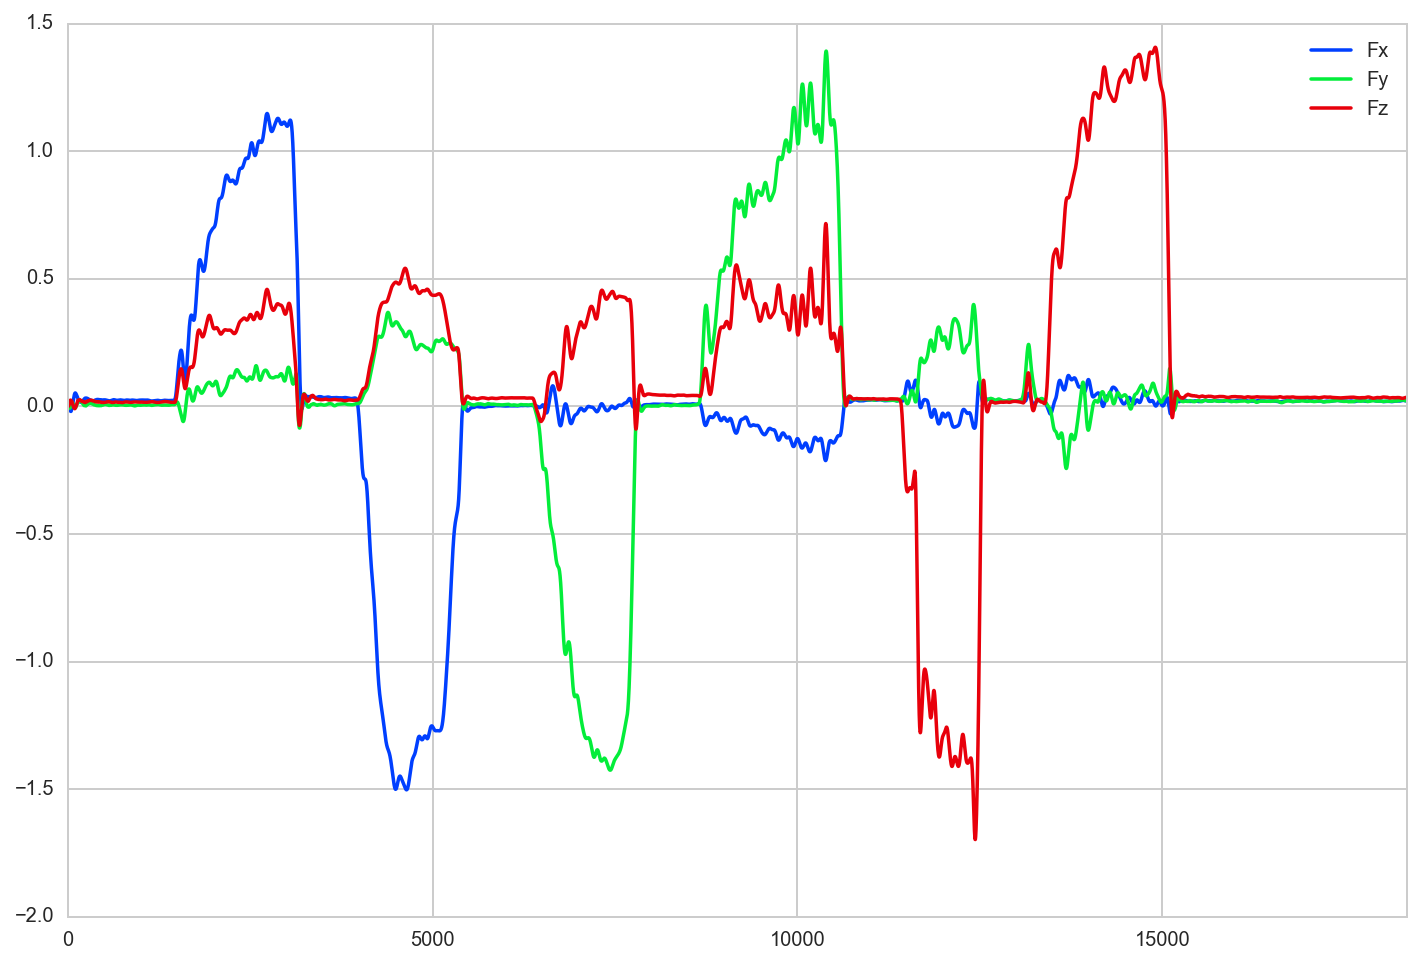

In [13]:
result.plot(y=["Fx","Fy","Fz"], figsize=(12,8))
plt.show()